In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


##Grabs the GoldCode module from the root of the repo
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from GoldCode import GoldCode
from GPSData import IQData

# Replica CA Code

In [2]:
#Choose which satellite's C/A code is generated
Satellite = 15

# Create list of C/A code Taps, for simpler sat selection",
sat = [(1,5),(2,6),(3,7),(4,8),(0,8),(1,5),(0,7),(1,8),(2,9),(1,2),(2,3),(4,5),(5,6),(6,7),(7,8),(8,9),(0,3),(1,4),(2,5),(3,6),(4,7),(5,8),(0,2),(3,5),(4,6),(5,7),(6,8),(7,9),(0,5),(1,6),(2,7),(3,8),(4,9),(3,9),(0,6),(1,7),(3,9)]
CodeGen = GoldCode(sat[Satellite - 1]) 
RepCode = CodeGen.getCode(1023 * 2, samplesPerChip = 4)


# Incoming CA Code

In [3]:
IncCode = CodeGen.getCode(1023 * 20, samplesPerChip = 4)
noise = np.random.normal(0, .1, len(IncCode))
IncCode = IncCode + noise

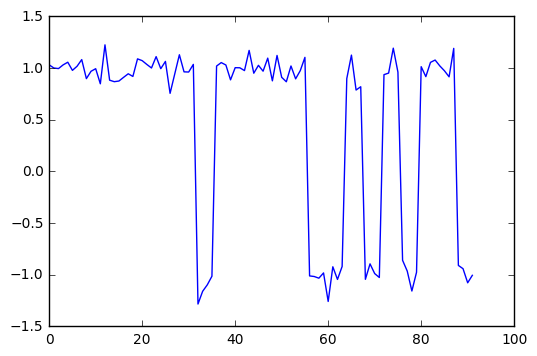

In [4]:
plt.plot(IncCode[0:92])
plt.show()

In [5]:
codeI = 0

Ip = np.zeros(len(IncCode))
for n, s in enumerate(IncCode):
    Ip[n] = IncCode[n] * RepCode[codeI]
    codeI = (codeI + 1) % 4092


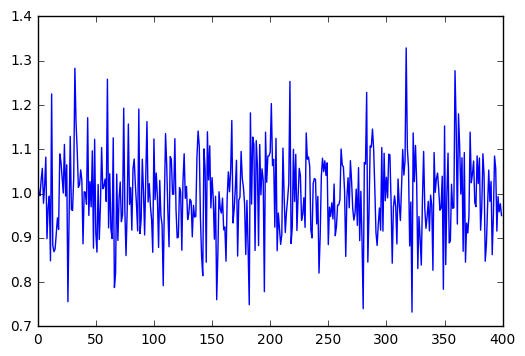

In [6]:
plt.plot(Ip[0:400])
plt.show()

In [7]:
# Add some "nav data"

for n, s in enumerate(IncCode):
    if (n >= 4092) and (n < 4092 * 2):
        IncCode[n] = IncCode[n] * -1



In [8]:
codeI = 0

Ip = np.zeros(len(IncCode))
for n, s in enumerate(IncCode):
    Ip[n] = IncCode[n] * RepCode[codeI]
    codeI = (codeI + 1) % 4092


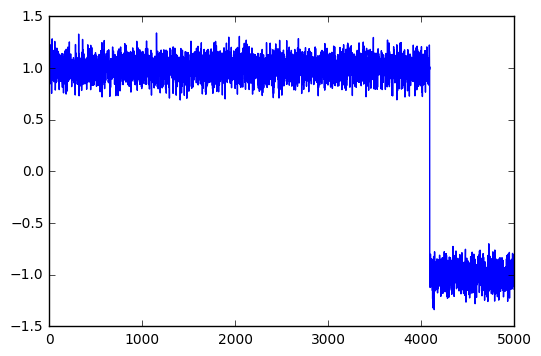

In [9]:
plt.plot(Ip[0:5000])
plt.show()

In [10]:
#Add some random code phase shifts

inserts = np.zeros(4)
for n, ins in enumerate(inserts):
    inserts[n] = int(np.random.randint(1000, 3000))

#inserts = [1000, 1001]
inserts

array([ 1086.,  2130.,  2099.,  2770.])

In [11]:
IncCodeShifted = IncCode
for ins in inserts:
    #print(IncCode[ins-1])
    IncCodeShifted = np.insert(IncCode, ins, IncCode[ins-1])

/home/evan/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:4480: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = arr[slobj]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:4482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = values
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:4486: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new[slobj] = arr[slobj2]


In [12]:
codeI = 0

Ip = np.zeros(len(IncCodeShifted))
for n, s in enumerate(IncCodeShifted):
    Ip[n] = IncCodeShifted[n] * RepCode[codeI]
    codeI = (codeI + 1) % 4092


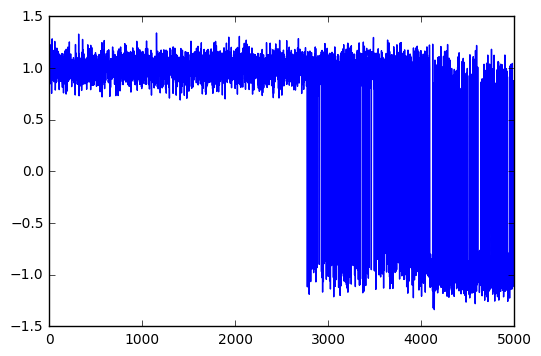

In [13]:
plt.plot(Ip[0:5000])
plt.show()

In [14]:
BUFSIZE = 100
codeI = 0
bufI = 0

Iebuf = np.zeros(BUFSIZE)
Ipbuf = np.zeros(BUFSIZE)
Ilbuf = np.zeros(BUFSIZE)

dlog = np.zeros(len(IncCodeShifted))


Iesum = np.zeros(len(IncCodeShifted))
Ipsum = np.zeros(len(IncCodeShifted))
Ilsum = np.zeros(len(IncCodeShifted))


for n, s in enumerate(IncCodeShifted):
    Ip = IncCodeShifted[n] * RepCode[codeI]
    Ie = IncCodeShifted[n] * RepCode[(codeI - 2) % 4092]
    Il = IncCodeShifted[n] * RepCode[(codeI + 2) % 4092]
    
    Iebuf[bufI] = Ie
    Ipbuf[bufI] = Ip
    Ilbuf[bufI] = Il
    
    Iesum[n] = sum(Iebuf)
    Ipsum[n] = sum(Ipbuf)
    Ilsum[n] = sum(Ilbuf)
    
    dlog[n] = Iesum[n] - Ilsum[n]
    
    bufI = (bufI + 1) % BUFSIZE
    codeI = (codeI + 1) % 4092
    
    if n == 3500:
        CodeI = (codeI + 4) % 4092

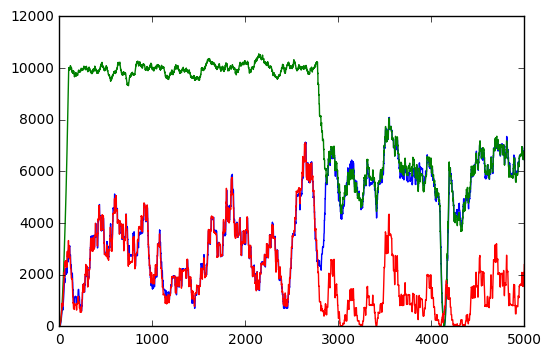

In [15]:
plt.plot(Iesum[0:5000] ** 2)
plt.plot(Ipsum[0:5000] ** 2)
plt.plot(Ilsum[0:5000] ** 2)
plt.show()

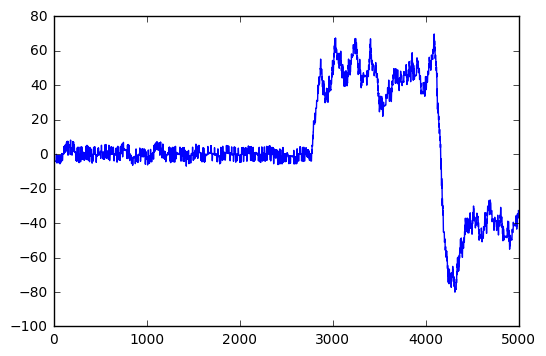

In [16]:
plt.plot(dlog[0:5000])
plt.show()

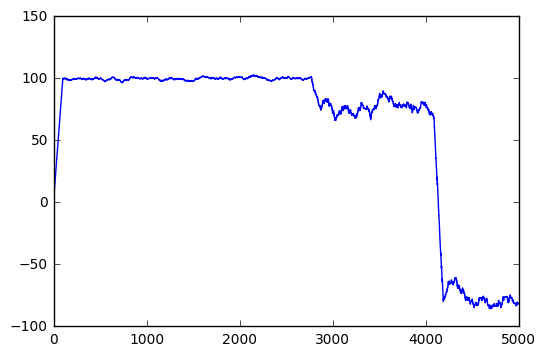

In [17]:
plt.plot(Ipsum[0:5000])
plt.show()